In [0]:
import numpy as np, matplotlib.pyplot as plt
from scipy.integrate import odeint

In [0]:
def seir(y,t,beta_1,beta_2, sigma, gamma, xi, mu_I,
                                  beta_D, beta_E, sigma_D, gamma_D, mu_D, theta_E, theta_I, psi_E, psi_I):

        dy = [0,0,0,0,0,0,0]   # "S","E","I","DE","DI","R","F"
        
        N   = sum(y)
        
        dy[0]  = - (beta_1*y[0]*y[2])/N - (beta_D*y[0]*y[4])/N + xi*y[5]- (beta_2*y[0]*y[1])/N - (beta_E*y[0]*y[3])/N + xi*y[5]

        dy[1]  = (beta_1*y[0]*y[2])/N + (beta_D*y[0]*y[4])/N+(beta_2*y[0]*y[1])/N + (beta_E*y[0]*y[3])/N - sigma*y[1] - theta_E*psi_E*y[1]

        dy[2]  = sigma*y[1] - gamma*y[2] - mu_I*y[2] - theta_I*psi_I*y[2]

        dy[3] = theta_E*psi_E*y[1] - sigma_D*y[3]

        dy[4] = theta_I*psi_I*y[2] + sigma_D*y[3] - gamma_D*y[4] - mu_D*y[4]

        dy[5]  = gamma*y[2]  + gamma_D*y[4] - xi*y[5]

        dy[6]  = mu_I*y[2] + mu_D*y[4]

        return dy

In [0]:
q=0.5
beta_1=0.155
beta_2= 0.03
sigma=1/5.2
gamma=1/12.39
xi=0.001
mu_I=0.0004
beta_D=0.100*0.5
beta_E = 0.01*0.5
sigma_D=1/4.0
gamma_D=1/9.0
mu_D=0.0004
theta_E=0.02
theta_I=0.02
psi_E=1.0
psi_I=1.0



In [0]:
n=100000
tmax=365
tvec=np.arange(0,tmax,0.1)
ic=np.zeros(7)
ic[0]=n-1
ic[2]=1

soln=odeint(seir,ic,tvec,args=(beta_1,beta_2, sigma, gamma, xi, mu_I,
                                  beta_D,beta_E, sigma_D, gamma_D, mu_D, theta_E, theta_I, psi_E, psi_I))

In [0]:
soln

array([[9.99990000e+04, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99989846e+04, 1.52645960e-02, 9.90086956e-01, ...,
        1.97907417e-03, 8.04138473e-03, 3.98401362e-05],
       [9.99989693e+04, 3.00691902e-02, 9.80561270e-01, ...,
        3.91762188e-03, 1.60252957e-02, 7.93698935e-05],
       ...,
       [5.48543916e+04, 1.56920105e+03, 3.34284693e+03, ...,
        9.69248292e+02, 3.89422130e+04, 1.89662349e+02],
       [5.48272311e+04, 1.56696592e+03, 3.33922109e+03, ...,
        9.68435457e+02, 3.89760476e+04, 1.89834744e+02],
       [5.48001223e+04, 1.56472982e+03, 3.33558896e+03, ...,
        9.67620125e+02, 3.90098404e+04, 1.90006961e+02]])

(0.0, 110000.0)

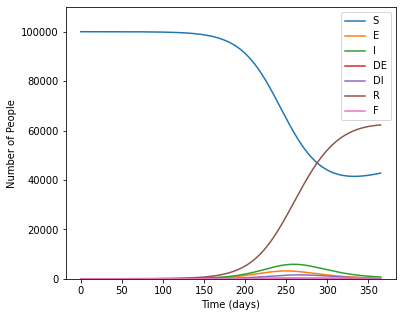

In [0]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(tvec,soln)
plt.xlabel("Time (days)")
plt.ylabel("Number of People")
plt.legend(("S","E","I","DE","DI","R","F"))
plt.ylim([0,110000])
